In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1.0,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8888888888888888, Loss: 0.3653055826822917
Checkpoint 20, Accuracy: 0.9197530864197531, Loss: 0.34191972238046153
Checkpoint 30, Accuracy: 0.9074074074074074, Loss: 0.3289048936631944
Checkpoint 40, Accuracy: 0.9135802469135802, Loss: 0.3125428800229673
Checkpoint 50, Accuracy: 0.9320987654320988, Loss: 0.3107423429135923
Checkpoint 60, Accuracy: 0.9444444444444444, Loss: 0.27172908076533564
Checkpoint 70, Accuracy: 0.9382716049382716, Loss: 0.2819702183758771
Checkpoint 80, Accuracy: 0.9320987654320988, Loss: 0.2815767217565466
Checkpoint 90, Accuracy: 0.9567901234567902, Loss: 0.22064858895760994
Checkpoint 100, Accuracy: 0.9567901234567902, Loss: 0.2091750038994683
Checkpoint 110, Accuracy: 0.9629629629629629, Loss: 0.20777606964111328
Checkpoint 120, Accuracy: 0.9629629629629629, Loss: 0.1890657212999132
Checkpoint 130, Accuracy: 0.9691358024691358, Loss: 0.14832724465264213
Checkpoint 140, Accuracy: 0.9691358024691358, Loss: 0.13538715574476454
Checkpoin

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [9.4879758e-01 4.4544012e-04 5.0757028e-02]
[1. 0. 0.] <-> [0.9777854  0.00420629 0.01800819]
[1. 0. 0.] <-> [0.9878357  0.00190569 0.01025854]
[1. 0. 0.] <-> [0.98054034 0.00114147 0.01831825]
[1. 0. 0.] <-> [0.98399657 0.00128898 0.0147144 ]
[1. 0. 0.] <-> [9.6065569e-01 6.2551186e-04 3.8718790e-02]
[1. 0. 0.] <-> [9.7410882e-01 6.8056432e-04 2.5210636e-02]
[1. 0. 0.] <-> [0.98761255 0.0034379  0.00894961]
[1. 0. 0.] <-> [0.96164256 0.01699085 0.02136658]
[1. 0. 0.] <-> [0.9816705  0.00105875 0.01727078]
[1. 0. 0.] <-> [9.085142e-01 6.268676e-04 9.085894e-02]
[0. 1. 0.] <-> [4.3867179e-03 9.9548364e-01 1.2968629e-04]
[0. 0. 1.] <-> [7.9846531e-01 5.4275390e-04 2.0099188e-01]
[1. 0. 0.] <-> [9.6536690e-01 4.8277687e-04 3.4150280e-02]
[1. 0. 0.] <-> [9.8218071e-01 8.8884815e-04 1.6930519e-02]
[1. 0. 0.] <-> [0.9838219  0.00109728 0.01508078]
[0. 0. 1.] <-> [1.14049986e-01 1.18988959e-04 8.85830998e-01]
[1. 0. 0.] <-> [6.0275710e-01 4.0387444e-04 3.9683905e-01]
[1. 0. 0.]

In [11]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

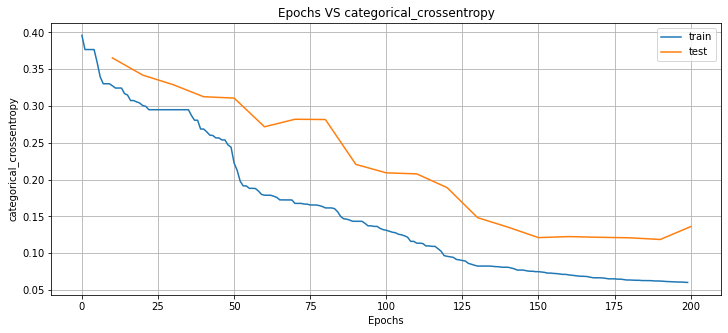

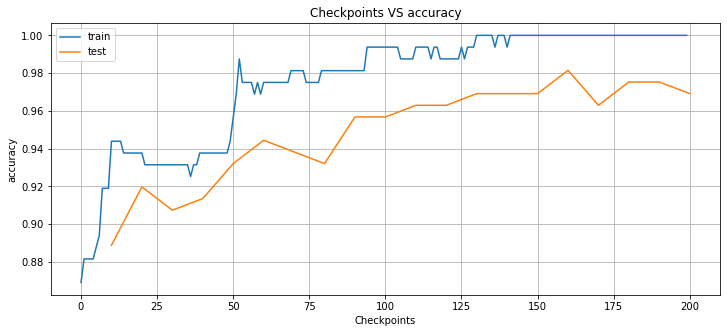

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8888888888888888, 'mean_square_error': 0.2030404155920324, 'categorical_crossentropy': 0.3653055826822917, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 18, 'tn_hit': 14, 'fn_hit': 0}, 1: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 5}, 2: {'tp_hit': 2, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 13}}, 'checkpoint': 10} 


{'accuracy': 0.9197530864197531, 'mean_square_error': 0.17604699990677822, 'categorical_crossentropy': 0.34191972238046153, 'essential_metrics': {0: {'tp_hit': 74, 'fp_hit': 11, 'tn_hit': 21, 'fn_hit': 2}, 1: {'tp_hit': 13, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 4}, 2: {'tp_hit': 8, 'fp_hit': 2, 'tn_hit': 91, 'fn_hit': 7}}, 'checkpoint': 20} 


{'accuracy': 0.9074074074074074, 'mean_square_error': 0.17416089284103706, 'categorical_crossentropy': 0.3289048936631944, 'essential_metrics': {0: {'tp_hit': 74, 'fp_hit': 13, 'tn_hit': 19, 'fn_hit': 2}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 6}, 2: {'tp_hit': 8, 'fp_hit': 2, 'tn_hit': 91, 'fn

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-2.015384   2.8770201  2.3661668  0.498862  -0.8401534]
 bias: -3.0

Neuron 1: weights:
[-1.2040805  3.         1.0362831 -3.        -1.448557 ]
 bias: 3.0

Neuron 2: weights:
[ 1.0109528  -1.0889343  -1.3117284  -0.93126047  3.        ]
 bias: 1.4998053312301636

Neuron 3: weights:
[-1.419232   2.8844862  0.7449286 -1.3961675  3.       ]
 bias: -1.8466583490371704

$
Layer 2
Neuron 0: weights:
[-3.          3.          0.99070853 -0.44171542]
 bias: 3.0

Neuron 1: weights:
[ 3.         1.9760569 -3.         3.       ]
 bias: 0.00940614938735962

Neuron 2: weights:
[-1.7272558  -3.          3.          0.76420796]
 bias: 3.0

$

